<a href="https://colab.research.google.com/github/ali-kmirzaei/PersianDigits/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialize**

In [ ]:
# import dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [2]:
!cp -rf /mydrive/dataset/ ../content

In [3]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential #FeedForward
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import os
import tensorflow as tf
import random

In [37]:
!pip install livelossplot

     |████████████████████████████████| 793 kB 7.4 MB/s 
     |████████████████████████████████| 381 kB 48.2 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.


In [38]:
from livelossplot import PlotLossesKeras

# **Prepare Dataset**

In [32]:
SIZE = 150
tmp = list()
X_train = list()
y_train = list()
X_test = list()
y_test = list()


# X = list()
# y = list()

name_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for name in name_list:
  path = 'dataset/'+name
  for item in os.listdir(path):
      img = plt.imread(os.path.join(path, item))
      img = cv.resize(img, (SIZE, SIZE))
      tmp.append((img, int(name)))

random.shuffle(tmp)

split = 70
for i in range(split):
  X_train.append(tmp[i][0])
  y_train.append(tmp[i][1])
for i in range(split,100):
  X_test.append(tmp[i][0])
  y_test.append(tmp[i][1])


# for ch in tmp:
#   X.append(ch[0])
#   y.append(ch[1])

In [33]:
X_test = np.array(X_test)
X_train = np.array(X_train)
X_train.shape

(70, 150, 150, 4)

In [34]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train.shape

(70,)

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(70, 10)

# **Model**

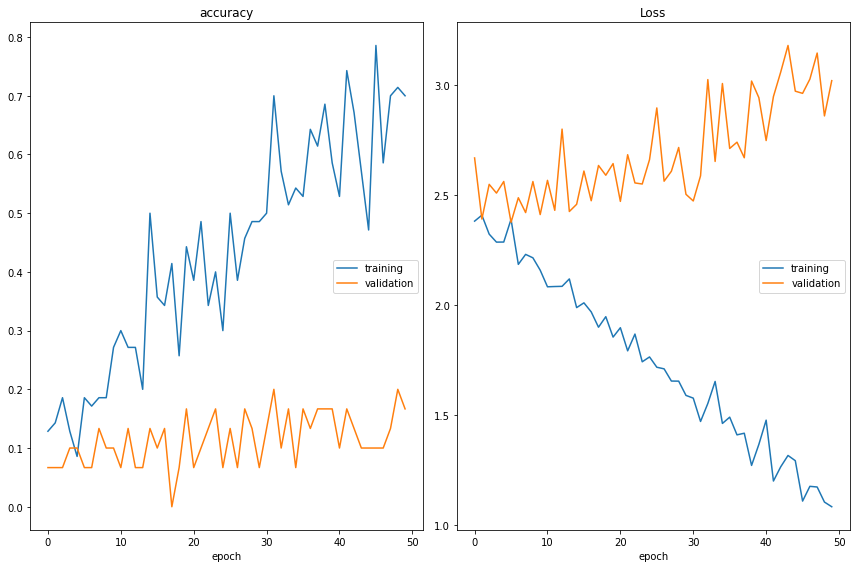

accuracy
	training         	 (min:    0.086, max:    0.786, cur:    0.700)
	validation       	 (min:    0.000, max:    0.200, cur:    0.167)
Loss
	training         	 (min:    1.084, max:    2.409, cur:    1.084)
	validation       	 (min:    2.377, max:    3.181, cur:    3.021)


In [39]:
EPOCHES = 50
LEARNING_RATE = 0.001
METRICS = ['accuracy']
LOSS = 'categorical_crossentropy'
VALIDATION_DATA = (X_test, y_test)


model = Sequential()
model.add(Input(shape=(SIZE, SIZE, 4)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10 , activation='softmax'))

opt = SGD(learning_rate = LEARNING_RATE)
model.compile(optimizer=opt, loss=LOSS, metrics=METRICS)
hist = model.fit(X_train, y_train, epochs=EPOCHES, validation_data=VALIDATION_DATA, callbacks=[PlotLossesKeras()], verbose=0)